## Compute cumulative returns

In [1]:
# The code below increases the size of the output screen...

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>



Notice that AXY is not traded on certain days...


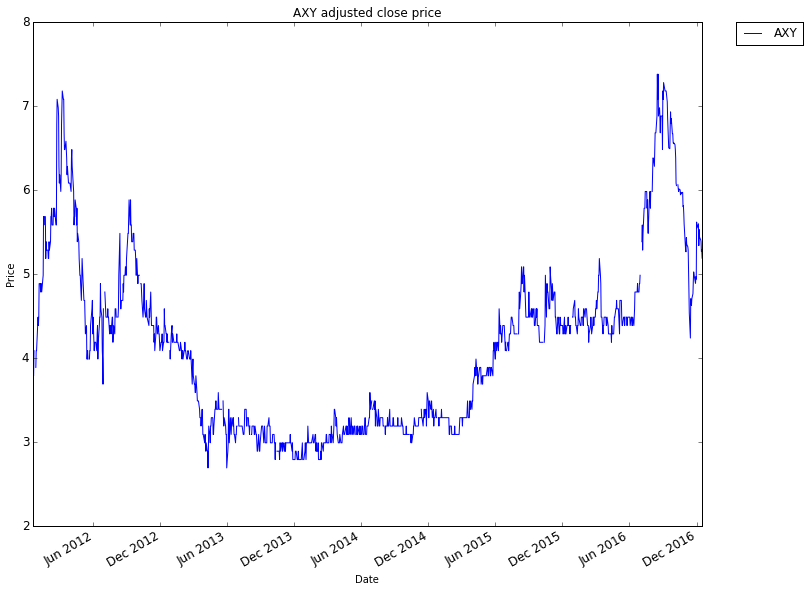



Empty trade dates are now filled-in using the fillna function for forward filling and back filling...


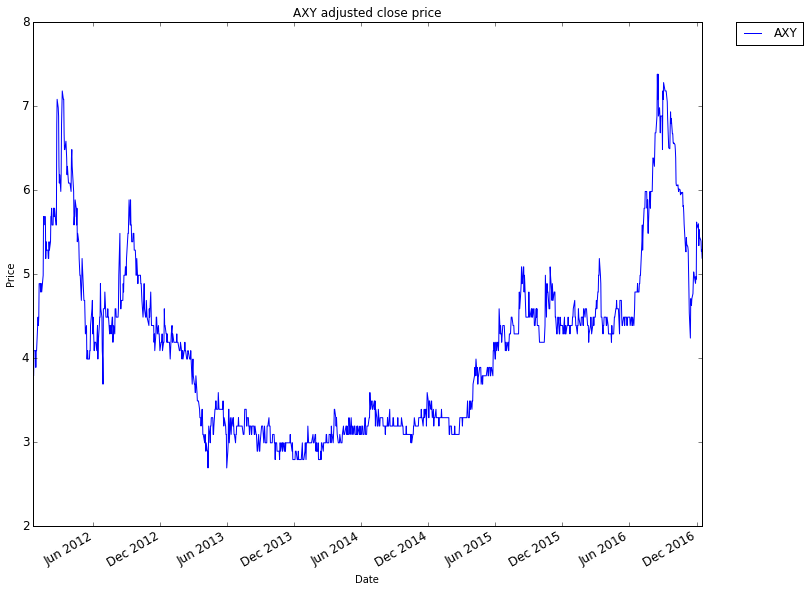

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def plot_selected(df, columns, start_index, end_index):

    plot_data(df.ix[start_index:end_index,columns], title="AXY adjusted close price")

def symbol_to_path(symbol, base_dir="data"):
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def get_data(symbols, dates):
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])

    return df

def plot_data(df, title="Stock prices"):
    ax = df.plot(title=title,fontsize=12,figsize=(12,10))
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()


def test_run():
    # Define a date range
    dates = pd.date_range('2011-12-18', '2016-12-18')

    # Choose stock symbols to read
    symbols = ['UPRO','GOOG','AAPL','AMZN','DIS','NFLX','FB','AXY','VIX','TSLA','GWPH','MSFT','GLD','RY','TM']  
    # SPY will be added in get_data()
    # new symbols -> RY (rbc), TM (Toyota)
    
    # Get stock data
    df = get_data(symbols, dates)

    # Slice and plot
    print "\n"
    print "Notice that AXY is not traded on certain days..."
    plot_selected(df, ['AXY'], '2011-12-18', '2016-12-18')
    
    df.fillna(method="ffill", inplace="True")
    df.fillna(method="bfill", inplace="True")
    # Slice and plot after filling empty trade days
    print "\n"
    print "Empty trade dates are now filled-in using the fillna function for forward filling and back filling..."
    plot_selected(df, ['AXY'], '2011-12-18', '2016-12-18')

if __name__ == "__main__":
    test_run()